# model of claster

In [1]:
import os
import pandas as pd
import numpy as np
import sklearn.cluster as cls
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
os.chdir("D:\projectPy")

In [3]:
def clustDBSCAN(featureArr, params):
    clustering  = cls.DBSCAN(eps=params[0], min_samples=params[1]).fit(featureArr)

    core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
    core_samples_mask[clustering.core_sample_indices_] = True
    labels = clustering.labels_

    # кол-во кластеров, за исключением шумовой сост.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    # визуализация 
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # черный для шума
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = featureArr[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = tuple(col),
                 markeredgecolor='k', markersize = 6)

        xy = featureArr[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = tuple(col),
                 markeredgecolor='k', markersize = 3)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
    
    return labels

In [4]:
workData = pd.read_csv('C001_040_080.csv', names = ['Time', 'Lg_Time2TimeMax',
                                                    'RCS', 'Lg_Rcs2RcsMax'], sep = ';', decimal=',')
workData.astype(np.float64)
workData.head()

,Time,Lg_Time2TimeMax,RCS,Lg_Rcs2RcsMax
0,10.8,-7.01,0.02,-28.20
1,21.1,-4.11,0.00,-46.72
2,21.0,-4.13,0.00,-40.10
3,20.7,-4.19,0.00,-40.30
4,20.4,-4.25,0.00,-46.72


In [5]:
a = np.array([workData['Time'].values])
b = np.array([workData['Lg_Rcs2RcsMax'].values])
featureArr = np.vstack((a, b)).T

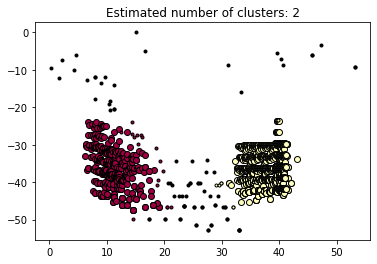

In [18]:
params = np.array([3, 11])
labels = clustDBSCAN(featureArr, params)

## 2 part DBSCAN

In [19]:
workData['labels_1'] = labels
a2 = np.array([workData['Time'].values[workData['labels_1'] == -1]])
b2 = np.array([workData['Lg_Rcs2RcsMax'].values[workData['labels_1'] == -1]])
featureArr2 = np.vstack((a2, b2)).T

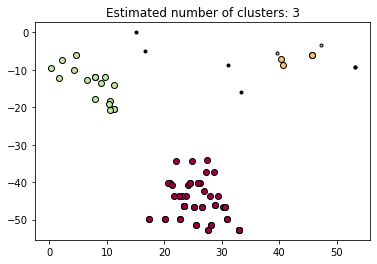

In [20]:
paramsDisc = np.array([6, 4])
labelsDisc = clustDBSCAN(featureArr2, paramsDisc)

In [21]:
workData['labels_2'] = workData['labels_1']
nClusters = len(set(labels)) - (1 if -1 in labels else 0)
labelsDisc[labelsDisc != -1] = labelsDisc[labelsDisc != -1]  + nClusters
workData['labels_2'].values[workData['labels_1'] == -1] = labelsDisc

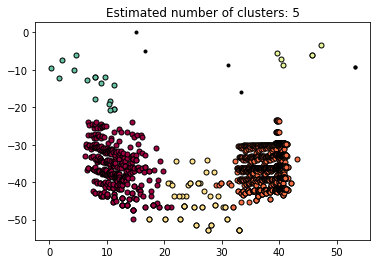

In [22]:
coreSamplesMask = np.zeros_like(workData['labels_2'], dtype=bool)
coreSamplesMask[workData['labels_2'].values != -1] = True
labelsFinal = workData['labels_2'].values

# кол-во кластеров, за исключением шумовой сост.
nClusters = len(set(labelsFinal)) - (1 if -1 in labelsFinal else 0)
    
# визуализация 
uniqueLabels = set(labelsFinal)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(uniqueLabels))]

for k, col in zip(uniqueLabels, colors):
    if k == -1:
        # черный для шума
        col = [0, 0, 0, 1]

    classMemberMmask = (labelsFinal == k)

    xy = featureArr[classMemberMmask & coreSamplesMask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = tuple(col),
        markeredgecolor='k', markersize = 5)

    xy = featureArr[classMemberMmask & ~coreSamplesMask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = tuple(col),
        markeredgecolor='k', markersize = 3)

plt.title('Estimated number of clusters: %d' % nClusters)
plt.show()